**Import Required Libraries , Warnings and data from CSV**






In [38]:
# Import Required Libraries and warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

In [2]:
# Import Data

data= pd.read_csv('/content/drive/MyDrive/Data Science/Practice - ML/Data Sets used/Data.csv')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


**Checking the data types, info etc.**

In [4]:
# Data Types

data.dtypes

,0
ID,int64
Gender,object
Age,int64
Customer Type,object
Type of Travel,object
Class,object
Flight Distance,object
Departure Delay,int64
Arrival Delay,float64
Departure and Arrival Time Convenience,int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  object 
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

**Exploratory Data Analysis**

**1. Handling Null values**

In [6]:
# Check for null data types

data.isnull().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,393
Departure and Arrival Time Convenience,0


In [7]:
# Arrival Delay is of float data type(Numerical Feature) - Null values can be replaced with Median values

data['Arrival Delay'].fillna(data['Arrival Delay'].median(),inplace=True)
data['Arrival Delay'].isnull().sum()

np.int64(0)

**2. Checking for Duplicated Values**

In [8]:
# Checking for duplicate values in the data set

data.duplicated().sum()

np.int64(0)

**3. Distribution of Target Column**

In [9]:
round(data['Satisfaction'].value_counts(normalize=True)*100,2)

,proportion
Satisfaction,
Neutral or Dissatisfied,56.55
Satisfied,43.45


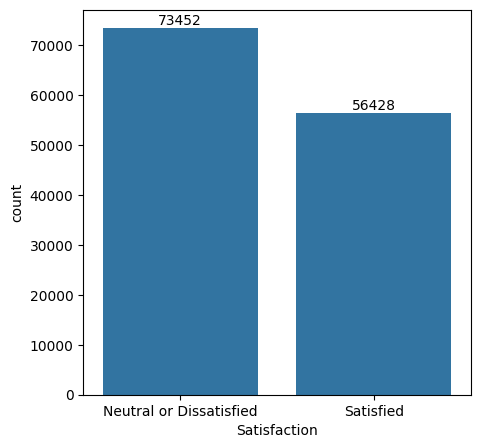

In [10]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data= data,x='Satisfaction')
plt.bar_label(ax.containers[0])
plt.show()

**4. Fixing the Data Type for *Flight Distance***

In [11]:
np.set_printoptions(threshold=np.inf)
data['Flight Distance'].unique()

array(['821', '853', '1905', '3470', '3788', '1963', '2607', '2822',
       '421', '453', '3460', '1676', '2168', '2867', '3734', '3088',
       '212', '173', '1672', '2884', '215', '67', '1554', '108', '1584',
       '2077', '1859', '2853', '3655$', '2485', '2199', '3997', '3392',
       '3391', '2423', '3213', '3201', '2865', '2035', '3513', '562',
       '2992', '1970', '1964', '3227', '2639', '3477', '1954', '2046',
       '3389', '1553', '162', '3043', '1868', '227', '2029', '2374',
       '3261', '3538', '3002', '2371', '1946', '22%7', '3758', '1534',
       '3424', '2731', '3415', '2$27', '1798', '3822', '213', '2975',
       '2569', '2497', '3880', '2888', '290', '2129', '3556', '3098',
       '2136', '3756', '3175', '2376', '1828', '3728', '1957', '3242',
       '719', '2689', '2903', '319', '3800', '612', '1708', '802', '3967',
       '825', '2770', '2026', '3357', '3044', '402', '3433', '1250',
       '2718', '1517', '2262', '590', '3183', '1895', '2204', '2146',
       '218

In [12]:
data['Flight Distance'] = data['Flight Distance'].astype(str)
data['Flight Distance']=data['Flight Distance'].str.replace('$','')
data['Flight Distance']=data['Flight Distance'].str.replace('%','')
data['Flight Distance']=data['Flight Distance'].astype(float)


In [13]:
data.isnull().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,0
Departure and Arrival Time Convenience,0


In [14]:
data['Flight Distance'].describe()

,Flight Distance
count,129880.000000
mean,1190.316392
std,997.452477
min,31.000000
25%,414.000000
50%,844.000000
75%,1744.000000
max,4983.000000


**5.UniVariate Analysis**

**5.1. Analysis of Numerical Features**

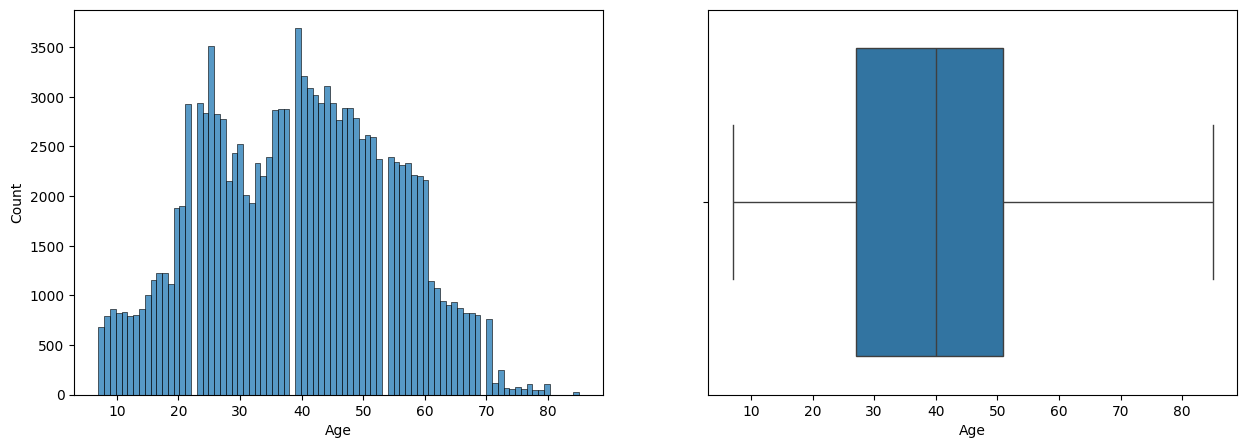

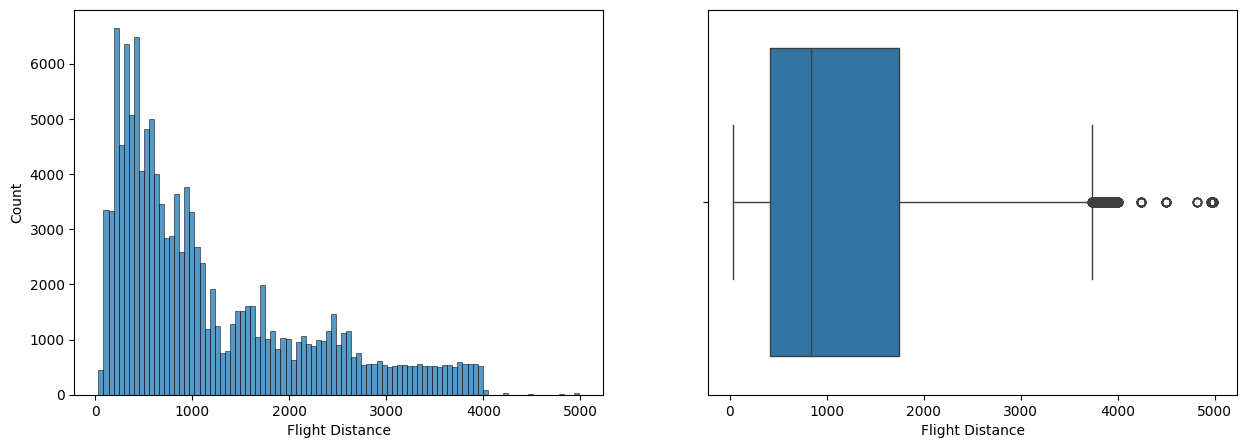

In [15]:
# Looping through Numerical Columns - Continous values

continous_numerical =['Age','Flight Distance']

for cols in data.columns:
  if data[cols].dtypes !='O' and cols in continous_numerical:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(data=data,x=cols)
    plt.subplot(1,2,2)
    sns.boxplot(data=data,x=cols)
    plt.show()

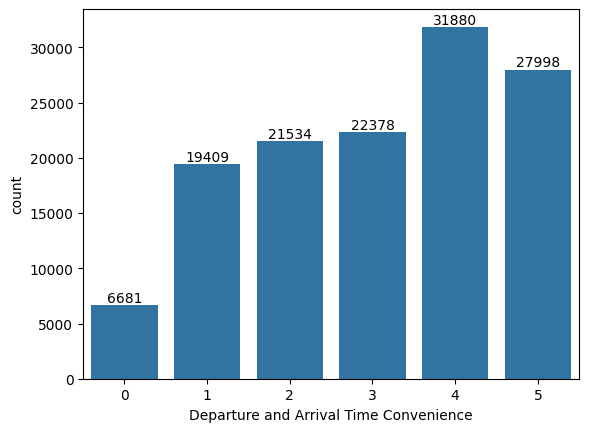

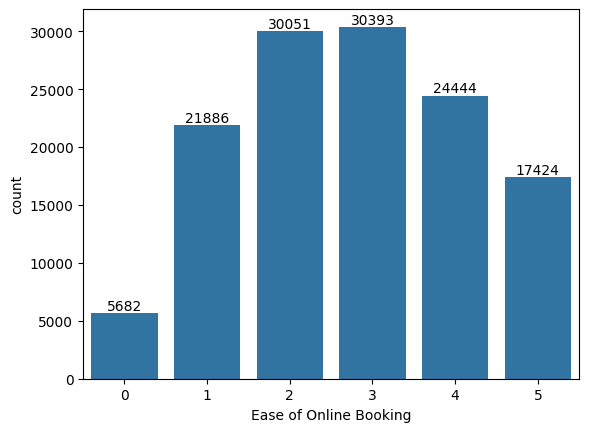

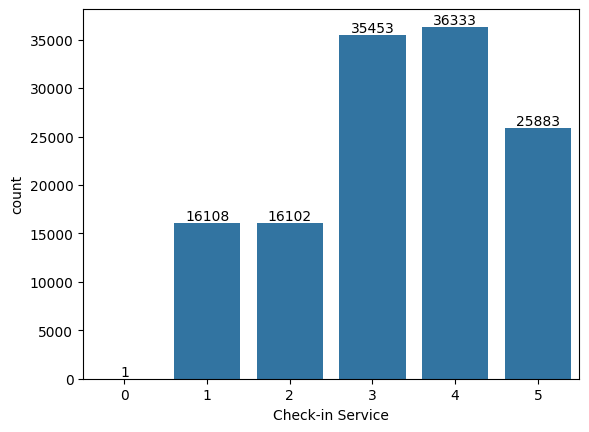

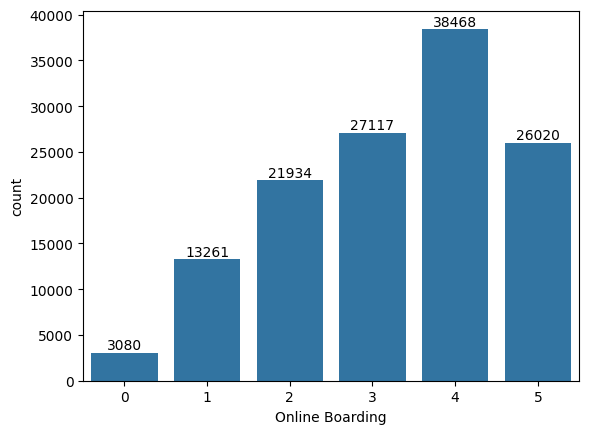

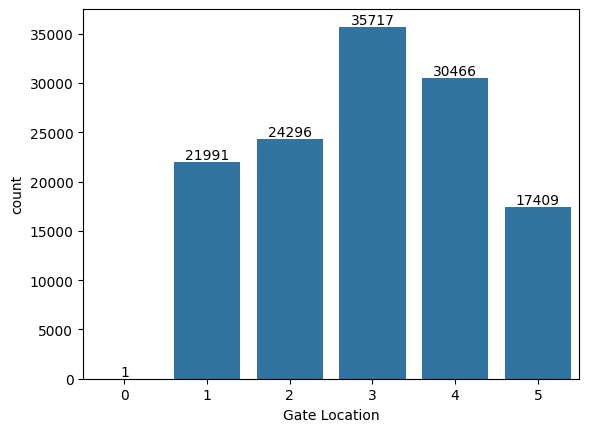

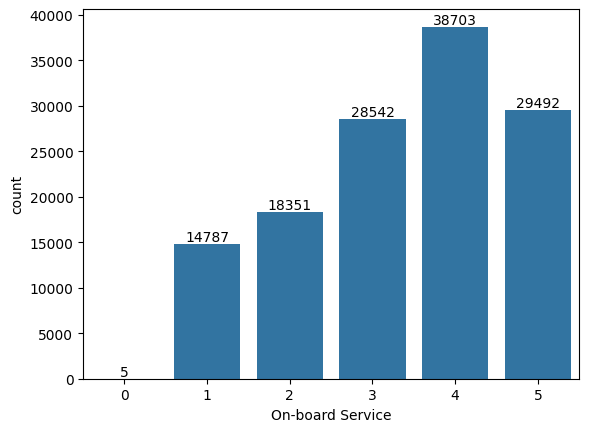

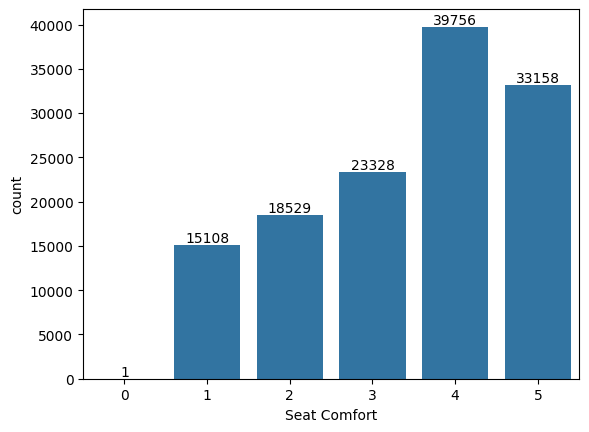

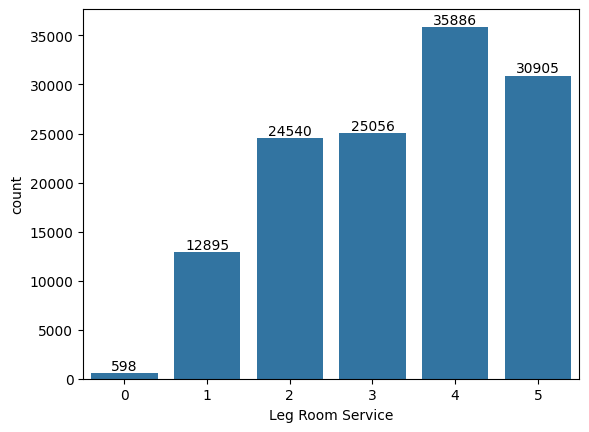

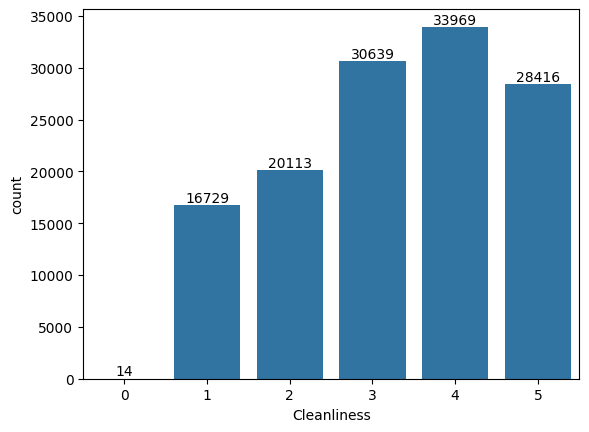

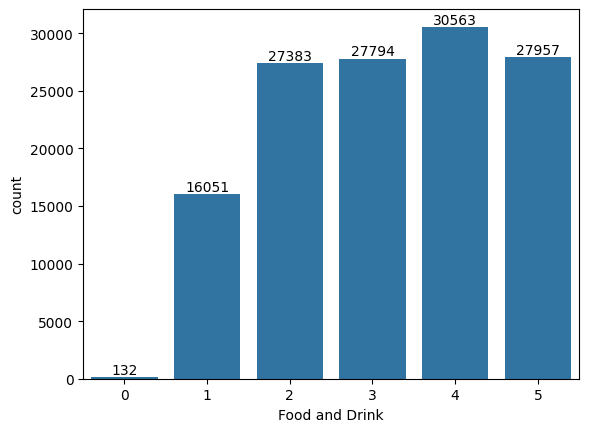

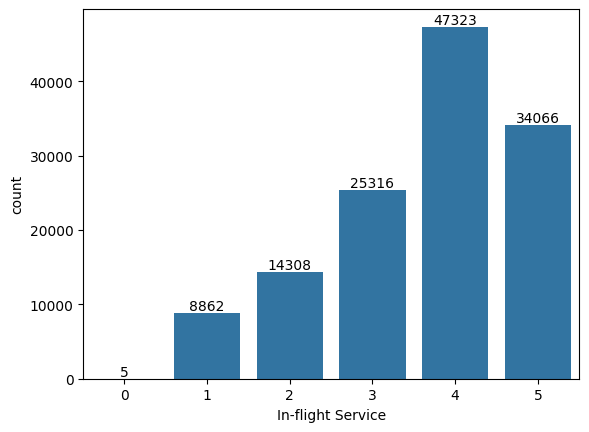

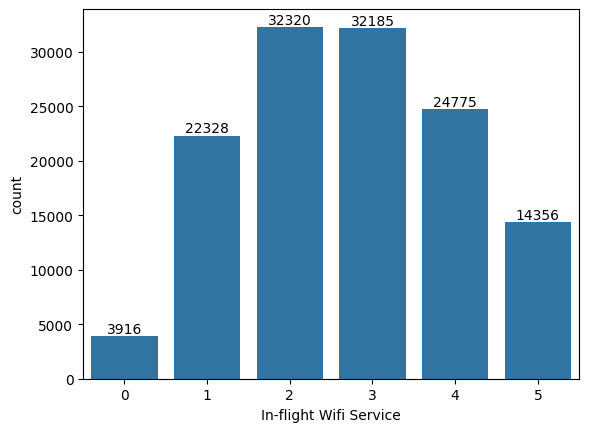

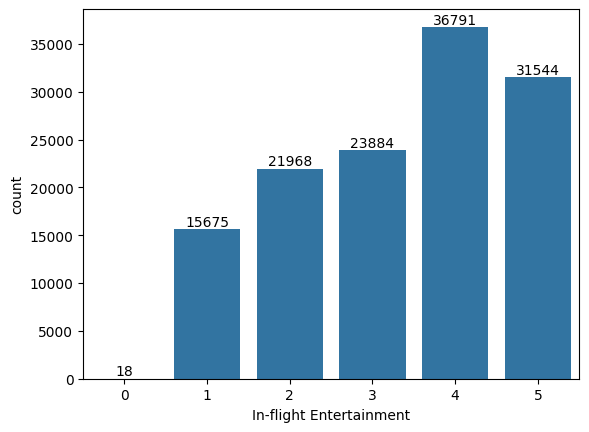

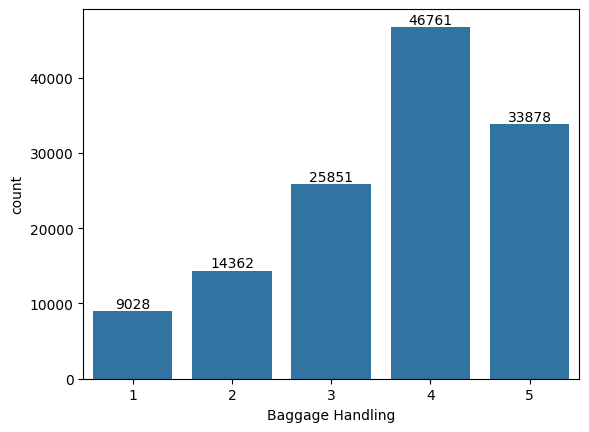

In [16]:
# Looping through Numerical Columns - Ordinal Values

continous_numerical =['Age','ID','Departure Delay','Arrival Delay','Flight Distance']

for cols in data.columns:
  if data[cols].dtypes !='O' and cols not in continous_numerical:
    ax=sns.countplot(data=data,x=cols)
    plt.bar_label(ax.containers[0])
    plt.show()

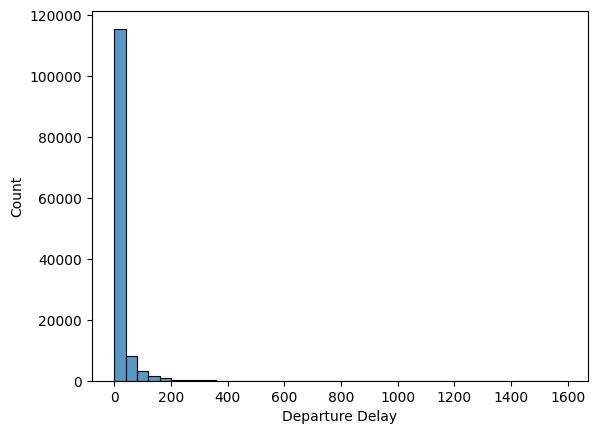

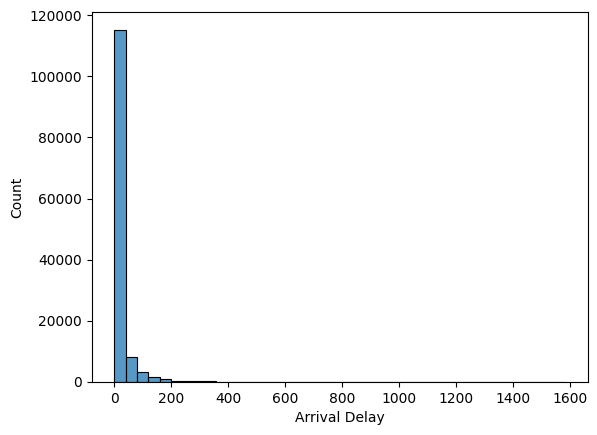

In [17]:
cols =['Departure Delay','Arrival Delay']
for i in cols:
  sns.histplot(data=data,x=i,bins=40)
  plt.show()

**5.2. Analysis of Categorical Data**

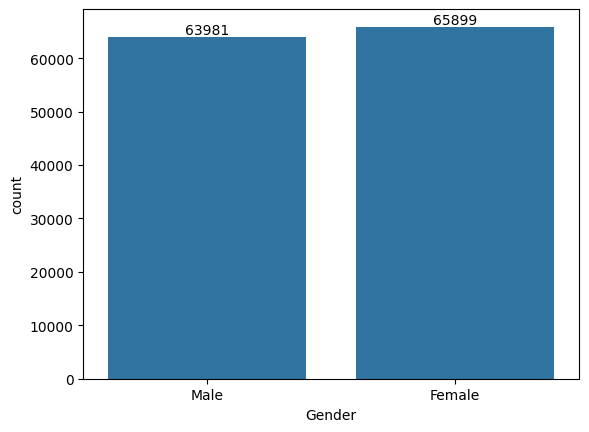

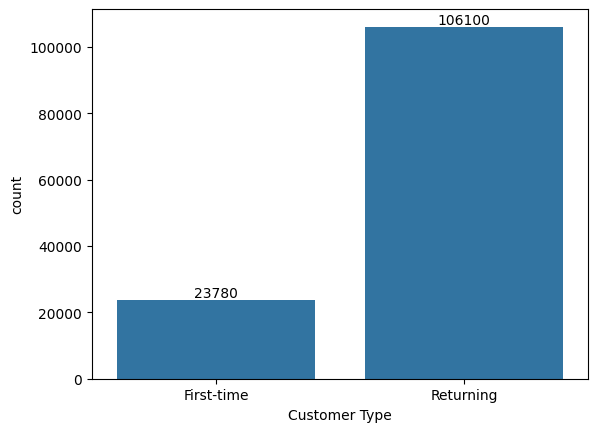

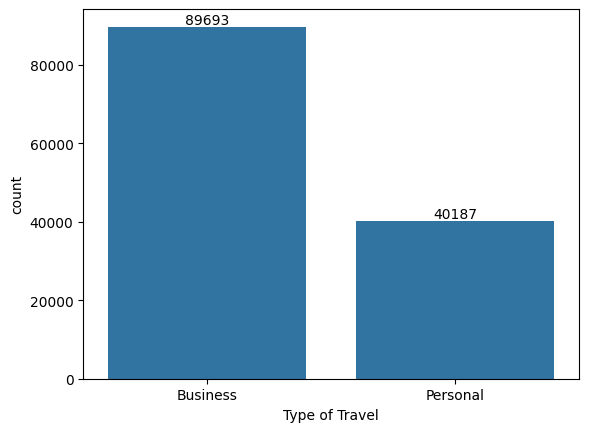

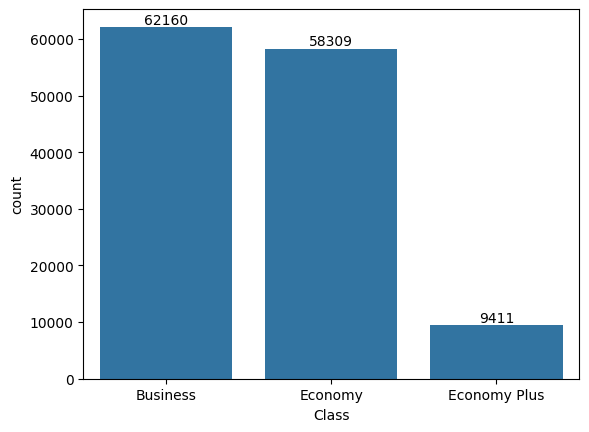

In [18]:
# Looping through Categorical Columns


for cols in data.columns:
  if data[cols].dtypes =='O' and cols not in ['Satisfaction','Flight Distance'] :
    ax=sns.countplot(data=data,x=cols)
    plt.bar_label(ax.containers[0])
    plt.show()

**6. BiVariate Analysis**

**6.1. Numerical Column against Target Column**

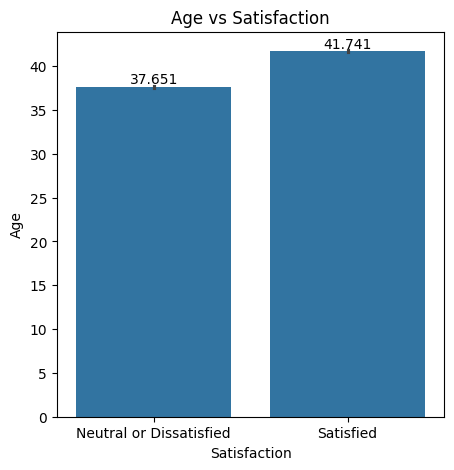

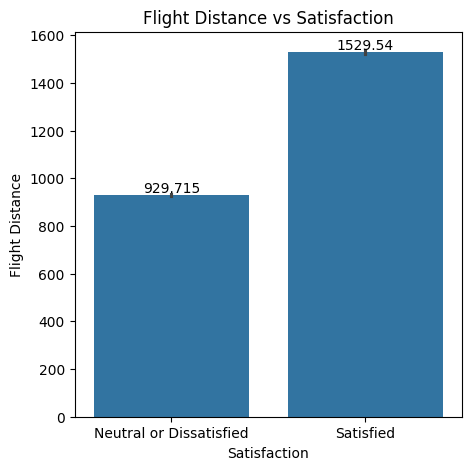

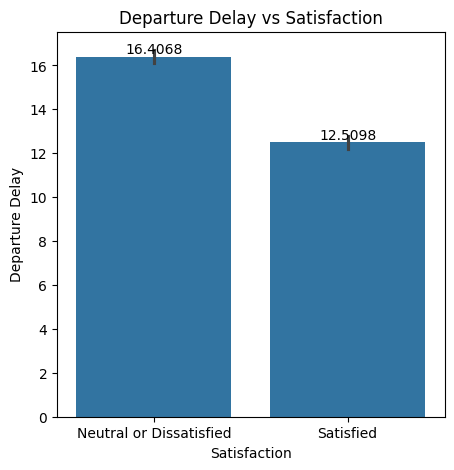

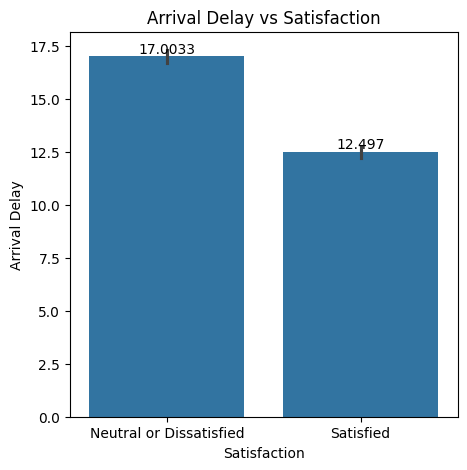

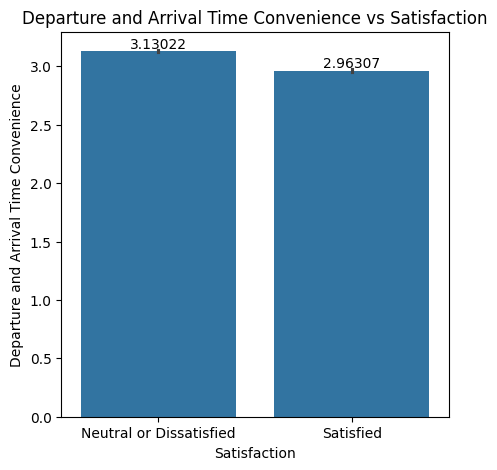

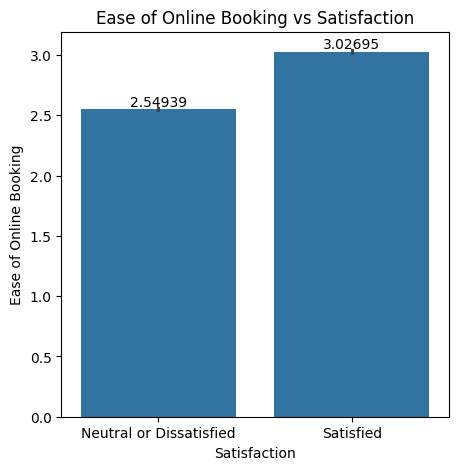

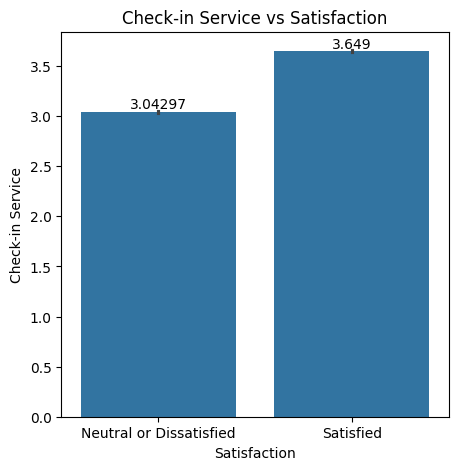

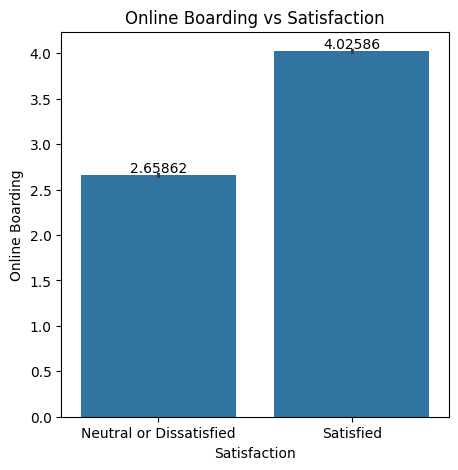

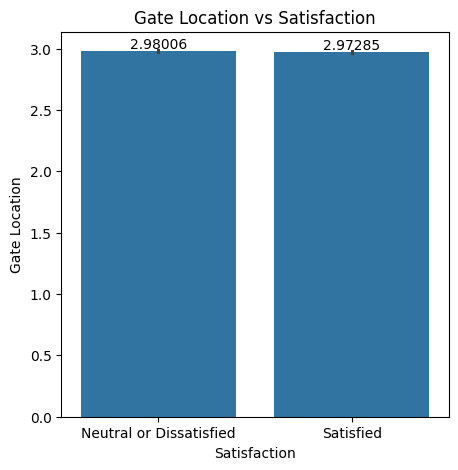

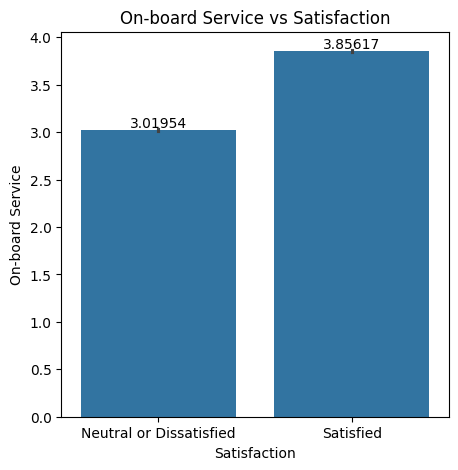

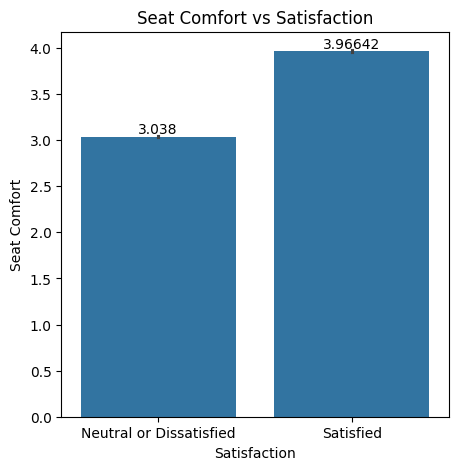

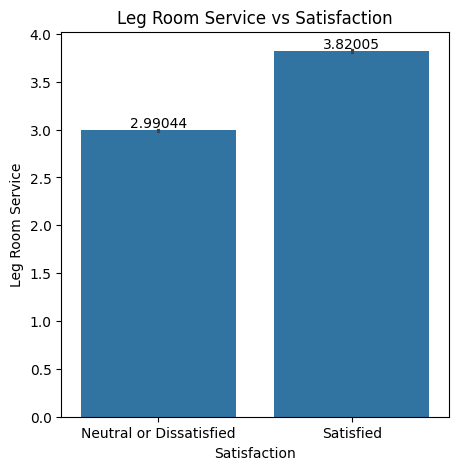

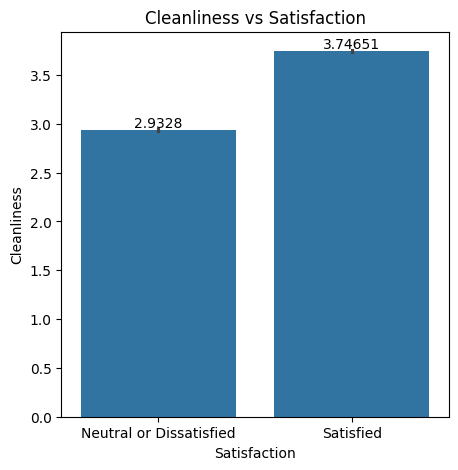

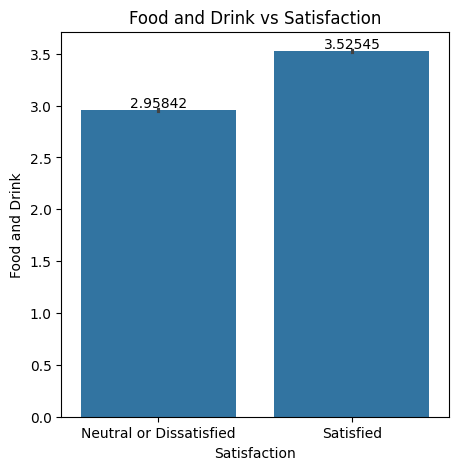

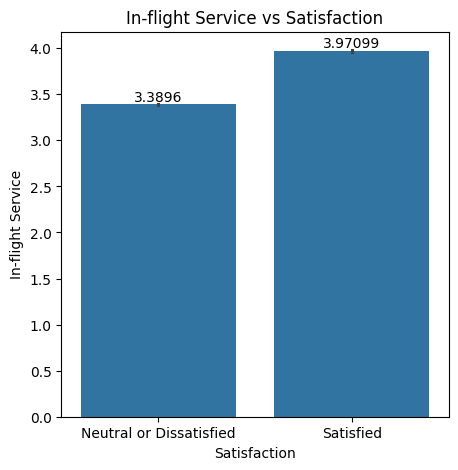

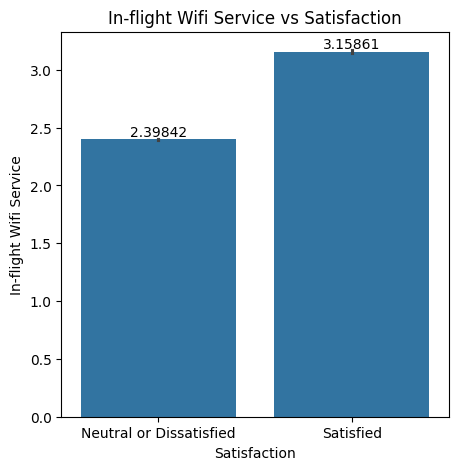

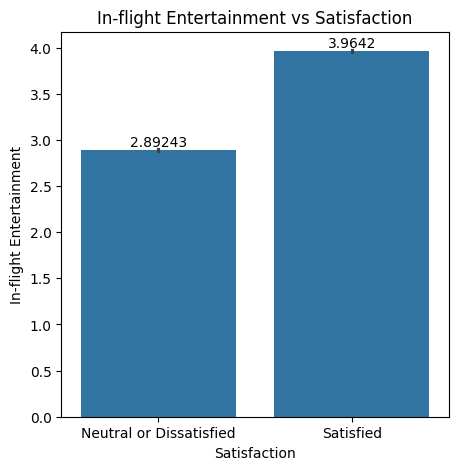

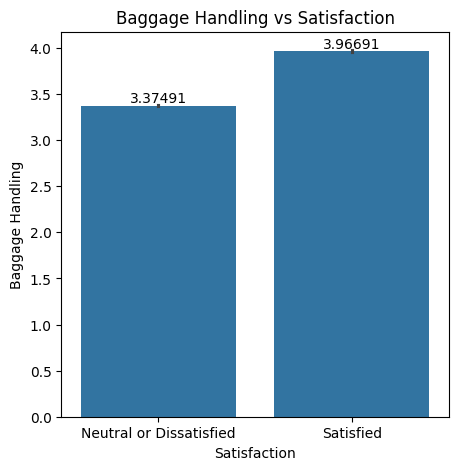

In [19]:
# Looping through Numerical Columns - Continous values

for cols in data.columns:
  if data[cols].dtypes !='O' and cols!='ID':
    plt.figure(figsize=(5,5))
    plt.title(f'{cols} vs Satisfaction')
    ax=sns.barplot(data=data,y=cols,x='Satisfaction')
    plt.bar_label(ax.containers[0])
    plt.show()

# **Encoding**
**7. Analysing and Converting Categorical Data to Numerical Data**

In [20]:
for cols in data.columns:
  if data[cols].dtypes =='O':
    print(f'{cols} : {data[cols].unique()}')

Gender : ['Male' 'Female']
Customer Type : ['First-time' 'Returning']
Type of Travel : ['Business' 'Personal']
Class : ['Business' 'Economy' 'Economy Plus']
Satisfaction : ['Neutral or Dissatisfied' 'Satisfied']


In [21]:
# If categorical Data has 2 values, then it can be manually converted into 0s and 1s of numerical data type

data['Gender']=data['Gender'].map({'Female':1,'Male':0})
data['Customer Type']=data['Customer Type'].map({'First-time':1,'Returning':0})
data['Type of Travel']=data['Type of Travel'].map({'Business':1,'Personal':0})
data['Satisfaction']=data['Satisfaction'].map({'Neutral or Dissatisfied':0,'Satisfied':1})

In [22]:
for cols in data.columns:
  if data[cols].dtypes =='O':
    print(f'{cols} : {data[cols].unique()}')

Class : ['Business' 'Economy' 'Economy Plus']


In [23]:
data = pd.concat([data, pd.get_dummies(data['Class'], drop_first=True,dtype='int')], axis=1)
data.drop(['Class'],axis=1,inplace=True)

In [24]:
data.dtypes

,0
ID,int64
Gender,int64
Age,int64
Customer Type,int64
Type of Travel,int64
Flight Distance,float64
Departure Delay,int64
Arrival Delay,float64
Departure and Arrival Time Convenience,int64
Ease of Online Booking,int64


In [25]:
data.head(5)

,ID,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Economy,Economy Plus
0,1,0,48,1,1,821.0,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0,0,0
1,2,1,35,0,1,821.0,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,0,0
2,3,0,41,0,1,853.0,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1,0,0
3,4,0,50,0,1,1905.0,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1,0,0
4,5,1,49,0,1,3470.0,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1,0,0


**8. Dropping Personal Identifiable Information(PII)**

In [26]:
data.drop(['ID'],axis=1,inplace=True)

**9. Correlation**

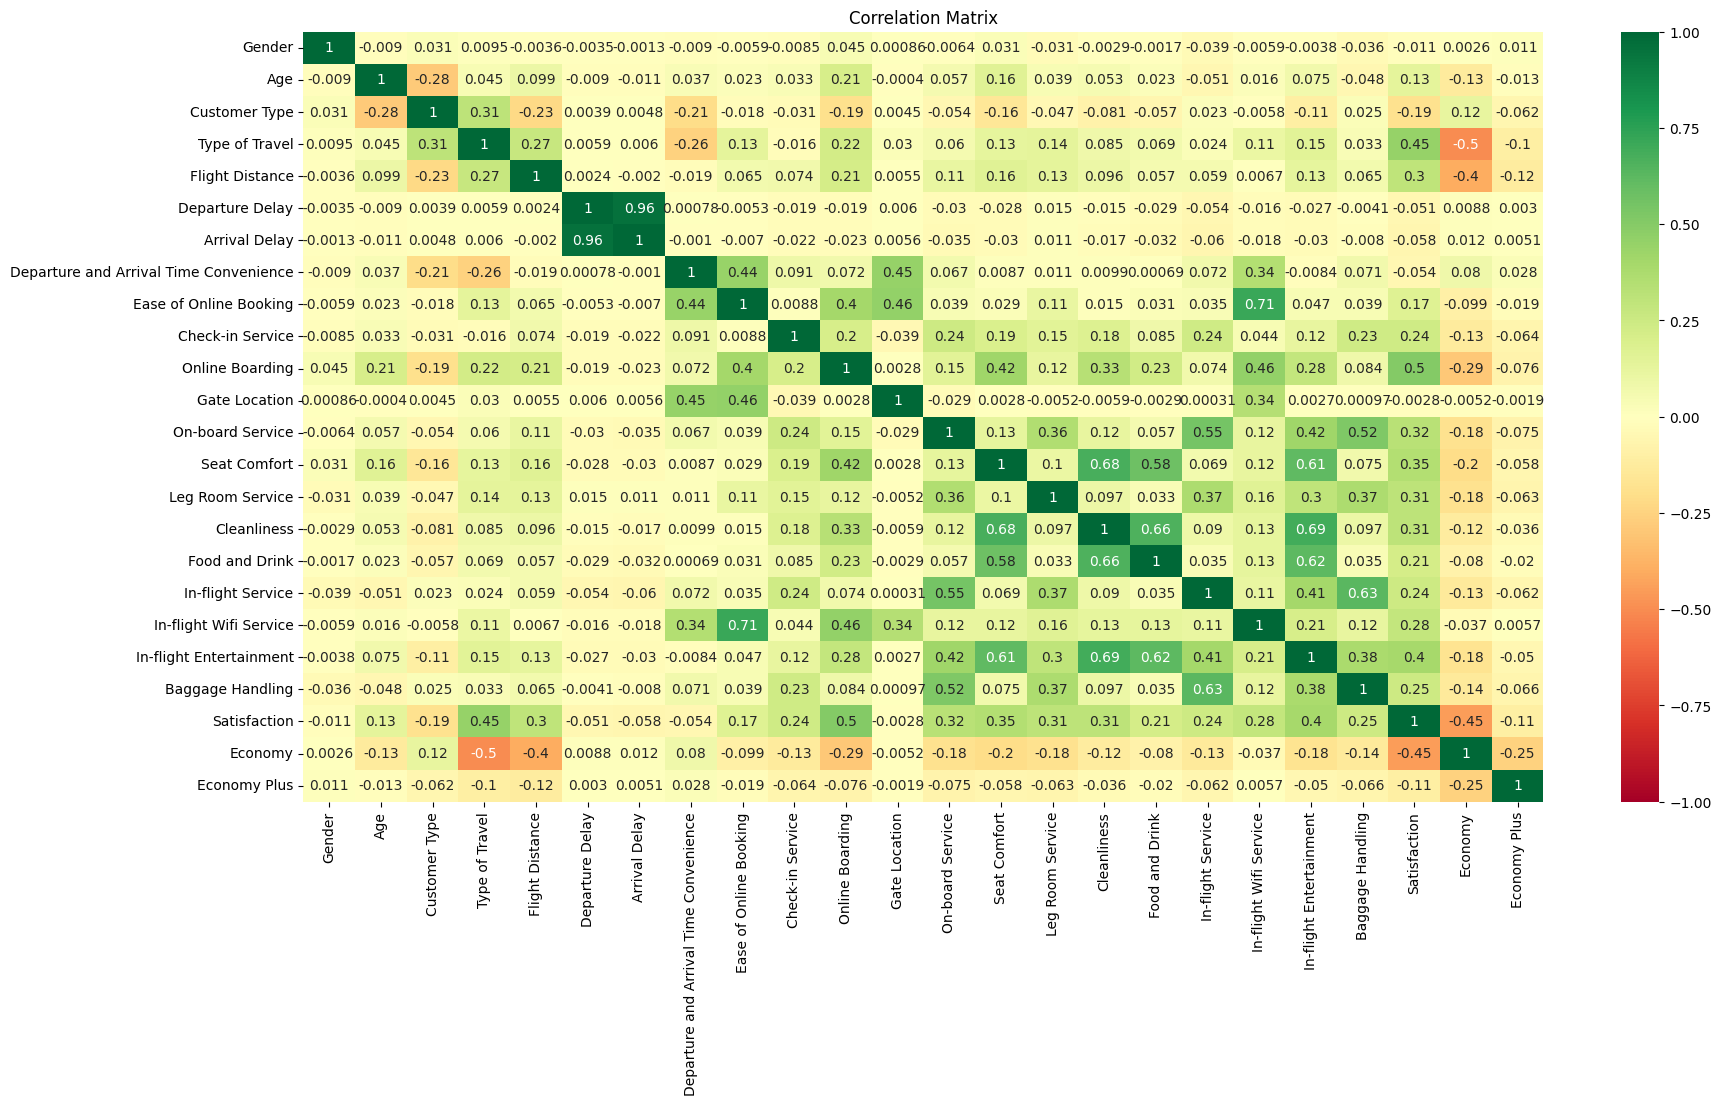

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn',vmin=-1,vmax=1)
plt.title("Correlation Matrix")
plt.show()

**10. Train-Test Split**

In [28]:
x= data.drop(['Satisfaction'],axis=1)
y=data[['Satisfaction']]

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(103904, 23)
(25976, 23)
(103904, 1)
(25976, 1)


**11. Standardisation**

In [30]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [31]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

 **12. Model Training and Testing**

In [32]:
decisiontree=DecisionTreeClassifier(random_state=42)
decisiontree.fit(x_train_scaled,y_train)

print(f"Decision Tree Classifier Training score : {round(decisiontree.score(x_train_scaled,y_train)*100,2)} %")

y_pred_dt=decisiontree.predict(x_test_scaled)
print(f"Decision Tree Classifier Testing score : {round(accuracy_score(y_test,y_pred_dt)*100,2)} %")


Decision Tree Classifier Training score : 100.0 %
Decision Tree Classifier Testing score : 94.38 %


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14723
           1       0.93      0.94      0.94     11253

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



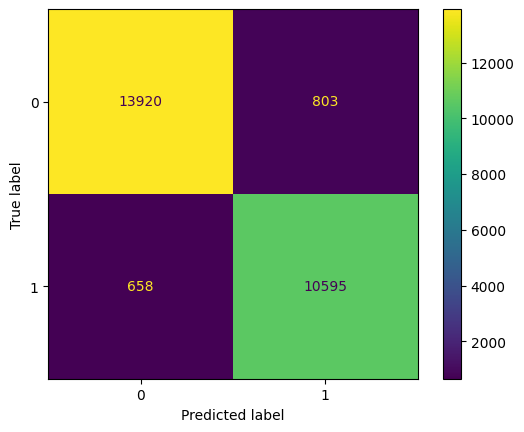

In [33]:
print(classification_report(y_test,y_pred_dt))
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)
plt.show()

In [34]:
randomforest=RandomForestClassifier(random_state=42)
randomforest.fit(x_train_scaled,y_train)

print(f"Random Forest Classifier Training score : {round(randomforest.score(x_train_scaled,y_train)*100,2)} %")

y_pred_rf=randomforest.predict(x_test_scaled)
print(f"Random Forest Classifier Testing score : {round(accuracy_score(y_test,y_pred_rf)*100,2)} %")


Random Forest Classifier Training score : 100.0 %
Random Forest Classifier Testing score : 96.22 %


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



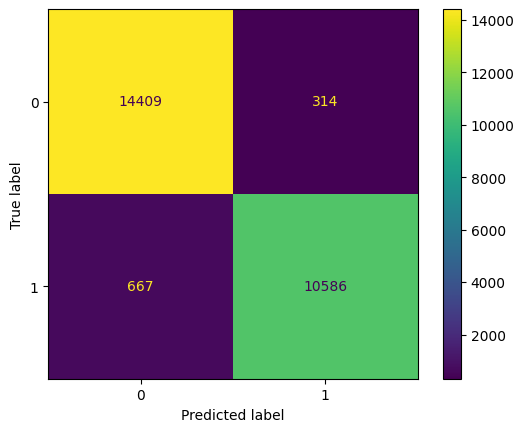

In [35]:
print(classification_report(y_test,y_pred_rf))
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)
plt.show()

In [36]:
knn=KNeighborsClassifier( n_jobs=-1)
knn.fit(x_train_scaled,y_train)

print(f"KNN Training score : {round(knn.score(x_train_scaled,y_train)*100,2)} %")

y_pred_knn=knn.predict(x_test_scaled)
print(f"KNN Testing score : {round(accuracy_score(y_test,y_pred_knn)*100,2)} %")


KNN Training score : 94.86 %
KNN Testing score : 92.84 %


              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14723
           1       0.95      0.88      0.91     11253

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.93     25976
weighted avg       0.93      0.93      0.93     25976



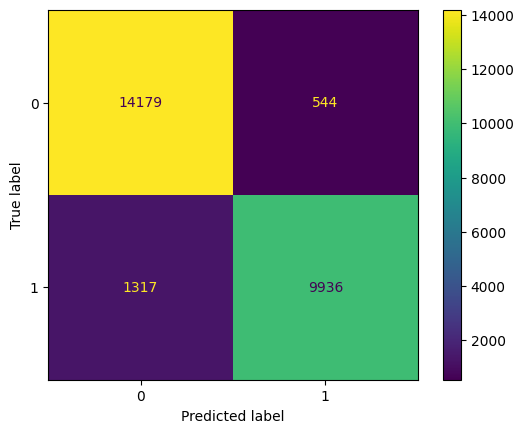

In [37]:
print(classification_report(y_test,y_pred_knn))
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn)
plt.show()

**13. Boosting Technique**



Training Accuracy for adaboost: 92.43 %
Testing Accuracy for adaboost 92.0
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     14723
           1       0.92      0.90      0.91     11253

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



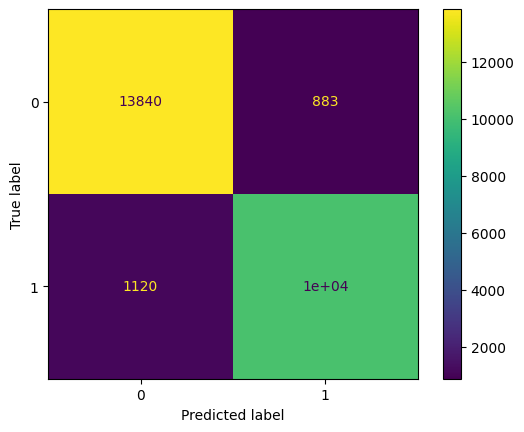

In [39]:
dt1=DecisionTreeClassifier(random_state=42,max_depth=1)
adboost_model = AdaBoostClassifier(estimator=dt1, n_estimators=100)
adboost_model.fit(x_train_scaled, y_train)
print('Training Accuracy for adaboost:', round(adboost_model.score(x_train_scaled, y_train)*100,2), '%')
# Prediction testing
y_pred_adaboost = adboost_model.predict(x_test_scaled)
# metrics
print('Testing Accuracy for adaboost', round(accuracy_score(y_test, y_pred_adaboost),2)*100)
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_adaboost)
print(classification_report(y_test,y_pred_adaboost))

**14. Variable Importance**

In [40]:
print(adboost_model.feature_importances_)

[0.         0.02343944 0.05078553 0.06946484 0.         0.
 0.02087251 0.02185093 0.00966902 0.02654963 0.15172743 0.
 0.01804649 0.01969447 0.04688941 0.00975875 0.         0.01118697
 0.41538136 0.03931685 0.00756037 0.03297885 0.02482716]


In [46]:
df_variable_importance = pd.DataFrame({'Feature': x_train_scaled.columns, 'Importance': adboost_model.feature_importances_})
df_variable_importance.sort_values(by='Importance', ascending=False, inplace=True)
df_variable_importance['Cumulative_Percentage'] = round(df_variable_importance['Importance'].cumsum()*100,2)

In [54]:
df_variable_importance

,Feature,Importance,Cumulative_Percentage
18,In-flight Wifi Service,0.415381,41.54
10,Online Boarding,0.151727,56.71
3,Type of Travel,0.069465,63.66
2,Customer Type,0.050786,68.74
14,Leg Room Service,0.046889,73.42
19,In-flight Entertainment,0.039317,77.36
21,Economy,0.032979,80.65
9,Check-in Service,0.026550,83.31
22,Economy Plus,0.024827,85.79
1,Age,0.023439,88.14
